#**Color Quantization**

Color quantization is a process that involves several key steps to reduce the number of colors in an image while maintaining its overall appearance.

Main Steps Involves:

**Color space analysis** : Examine the colors present in the original image to understand their distribution and frequency.

**Palette selection** : Choose a target color palette with fewer colors, using algorithms that consider color distribution and visual perception factors.

**Color clustering** : Group similar colors in the original image, assigning them a representative color from the selected palette.

**Color mapping** : Replace the original colors in the image with their corresponding representative colors from the reduced palette, minimizing visual differences between the original and quantized images.

**Exploring Image**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
image = mpimg.imread(r'/content/img.jpg')

array([[[151, 205, 251],
        [151, 205, 251],
        [151, 205, 251],
        ...,
        [ 22,  14,  12],
        [ 25,  17,  14],
        [ 24,  16,  13]],

       [[150, 204, 250],
        [150, 204, 250],
        [150, 204, 250],
        ...,
        [ 11,   3,   1],
        [ 14,   6,   4],
        [ 16,   8,   5]],

       [[150, 204, 250],
        [149, 203, 249],
        [150, 204, 250],
        ...,
        [ 13,   8,   5],
        [ 16,  11,   8],
        [ 20,  15,  12]],

       ...,

       [[ 69,  85,  12],
        [ 79,  95,  22],
        [ 80,  96,  25],
        ...,
        [119,  99,  49],
        [118,  98,  48],
        [117,  97,  47]],

       [[ 85, 101,  26],
        [ 90, 106,  31],
        [ 85, 101,  30],
        ...,
        [118, 100,  50],
        [119,  99,  49],
        [119,  99,  49]],

       [[ 86, 102,  27],
        [ 94, 110,  35],
        [ 95, 111,  40],
        ...,
        [118, 100,  50],
        [121, 101,  51],
        [121, 101,  51]]], dtype=uint8)
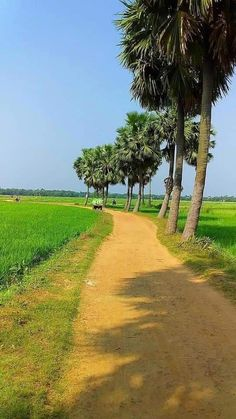

In [ ]:
image

In [ ]:
image.shape

# height = 419
# width = 236
# channles = 3   (R,G,B)

(419, 236, 3)

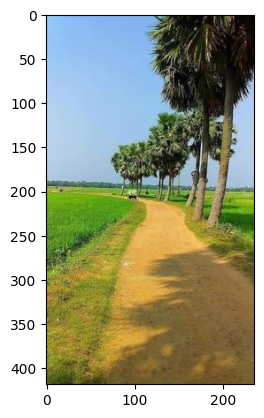

In [ ]:
plt.imshow(image)

**Color selection**

There are different green colors like dark green on trees,light green on crops,light brownish color on tree barks and golden type color on path.Black effect on shadows and light blue color on sky.

So we select 6 color pallete.

In [ ]:
(H,W,C) = image.shape

We have to form R G B as three different columns with all R shades in R column and similarly with G and B.This is because it takes a form of data frame with R,G and B as features and we predict 6 different lables.

In [ ]:
#image is 3D array and to make it in the form of data frame we have to convert it to 2D array

image_2d = image.reshape(H*W,C)

In [ ]:
image_2d

array([[151, 205, 251],
       [151, 205, 251],
       [151, 205, 251],
       ...,
       [118, 100,  50],
       [121, 101,  51],
       [121, 101,  51]], dtype=uint8)

**Clustering using KMeans Model**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
K_model = KMeans(n_clusters=6,n_init=10)

In [ ]:
K_model.fit(image_2d)

KMeans(n_clusters=6, n_init=10)

In [ ]:
clusters = K_model.predict(image_2d)

In [ ]:
clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
image_frame = pd.DataFrame(data = image_2d,columns=['R','G','B'])

In [ ]:
image_frame['Clusters'] = clusters

In [ ]:
image_frame

,R,G,B,Clusters
0,151,205,251,0
1,151,205,251,0
2,151,205,251,0
3,151,205,251,0
4,152,206,252,0
...,...,...,...,...
98879,114,98,47,1
98880,118,100,50,1
98881,118,100,50,1
98882,121,101,51,1


**Centroids of Clusters**

These are main values where each row represent the color palette of image.These are mapped with lables such that 0 corresponds to first row,1 to second,2 to third,3 to fourth,4 to fifth and 5 to sixth row.

In [ ]:
rgb_codes = K_model.cluster_centers_.astype(int)

In [ ]:
rgb_codes

array([[159, 195, 232],
       [112,  99,  53],
       [ 97, 150,  28],
       [151, 140,  63],
       [215, 174,  83],
       [ 31,  33,  18]])

In [ ]:
processed_image = rgb_codes[clusters]

In [ ]:
#reshaping to original dimensions

quantized_image = np.reshape(processed_image,(H,W,C))

In [ ]:
quantized_image

array([[[159, 195, 232],
        [159, 195, 232],
        [159, 195, 232],
        ...,
        [ 31,  33,  18],
        [ 31,  33,  18],
        [ 31,  33,  18]],

       [[159, 195, 232],
        [159, 195, 232],
        [159, 195, 232],
        ...,
        [ 31,  33,  18],
        [ 31,  33,  18],
        [ 31,  33,  18]],

       [[159, 195, 232],
        [159, 195, 232],
        [159, 195, 232],
        ...,
        [ 31,  33,  18],
        [ 31,  33,  18],
        [ 31,  33,  18]],

       ...,

       [[112,  99,  53],
        [112,  99,  53],
        [112,  99,  53],
        ...,
        [112,  99,  53],
        [112,  99,  53],
        [112,  99,  53]],

       [[112,  99,  53],
        [112,  99,  53],
        [112,  99,  53],
        ...,
        [112,  99,  53],
        [112,  99,  53],
        [112,  99,  53]],

       [[112,  99,  53],
        [112,  99,  53],
        [112,  99,  53],
        ...,
        [112,  99,  53],
        [112,  99,  53],
        [112,  99,  53]]

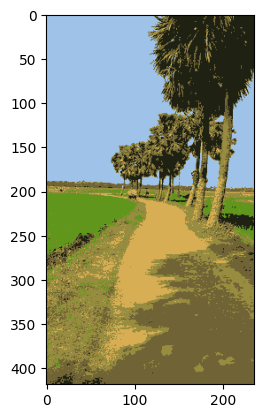

In [ ]:
plt.imshow(quantized_image)